# Project Template

The following template repeats the essential steps for scraping, tokenizing, and mapping sentiment data. Each major step is further broken down into smaller steps. You can step through most of the code. 
- You will  have to create your own dataframe names
- Customize the filters
- Customize the maps

#### Note

When your individual input is required the following symbol will appear:</br> 
![](edit-code.png)

You should save your results to a `pickle` file after each major step. These points are indicated by the save icon:</br>
![](save.png)
</br>
They are also titled **Export Pickle**
You will need to import these results into the `project_presentation_template`

---


## 2 Data Input and Wrangling

### Introduction

In this step, you will download a CSV file from Gutenberg, modify it, and save it locally for further analysis.

#### Process Steps:
- Load a CSV file from a remote source
- Save the file locally

### Step-by-Step Guide

#### Step 1: Import the Required Libraries

The primary library for handling CSV data in Python is `pandas`. Make sure it’s imported at the beginning of your script.

```python
import pandas as pd
```

In [32]:
import pandas as pd

#### Step 2: Import Pickle File 
In lesson 2_1 we created a clean pickle file of the catalog, we can simply start there rather than running through all those steps.

In [34]:
pg_catalog_clean=pd.read_pickle('pg_catalog_clean.pickle')

---


![](edit-code.png)

#### Step 3: Create a custom dataframe

##### Overview

In lesson 2_2 we learned how to filter dataframes. For this part of the project, you are going to create your own pg_catalog dataframe that includes the corpus of works you want to analyze. Your corpus can be as large as you want, but keep in mind that having a lot of text can significantly increase your processing time. 

##### Requirements
Please follow the following parameters when creating our custom dataframe:

1. Unique descriptive dataframe name (i.e. not `df_virginia_history`)

2. Corpus should have a logical coherence.

3. You should aim for at least 25 texts

4. Save the resulting dataframe as a pickle file

##### Note
Remember to make a deep copy of your dataframe by using the method `.copy()`

###### *Example*
```python
df_virginia_history = df_pg_catalog[
    (df_pg_catalog.language == 'en') & 
    (df_pg_catalog.type == 'Text') 
].copy()
```


Save the dataframe to a pickle file: 

```python
df_virginia_history.to_pickle('custom_file.pickle')
```

In [40]:
df_dickens = pg_catalog_clean[
    (pg_catalog_clean.language == 'en') & 
    (pg_catalog_clean.type == 'Text') &
    (pg_catalog_clean.first_name=='Charles')&
    (pg_catalog_clean.last_name=='Dickens')
].copy()

---


## 3 Scraping Gutenberg

### Overview

In the previous section you were meant to create a custom dataframe. Here you are going to scrape that data frame. The scraping function assumes that your first column is called `text_id`. If that is not the case then something went wrong with the filtering process. 

#### Load `gutenberg_scraper`

Since you only need to perform one function `fetch_text_data()` all of the other logic has been tucked away in a `.py` file. You can load the python file and function in like any other import as long as the file is present in your root directory. 

In [46]:
from gutenberg_scraper import fetch_text_data

In [47]:
#This line is here to let you walk through the code. It takes a random sample from the Project Gutenberg Catalog and runs it through all the steps.
#df_dickens = pg_catalog_clean.sample(10)

In [48]:
fetch_text_data(df_dickens)

100%|██████████| 87/87 [00:56<00:00,  1.54it/s]


,text_id,type,issued,title,language,subjects,locc,bookshelves,second_author,last_name,first_name,birth,death,text_data
45,46,Text,2004-08-11,A Christmas Carol in Prose; Being a Ghost Stor...,en,Christmas stories; London (England) -- Fiction...,PR,Children's Literature; Christmas; Browsing: Ch...,"Leech, John, 1817-1864 [Illustrator]",Dickens,Charles,1812,1870,A CHRISTMAS CAROL IN PROSE; BEING A GHOST STOR...
97,98,Text,1994-01-01,A Tale of Two Cities,en,Historical fiction; France -- History -- Revol...,PR,Historical Fiction; Browsing: History - Britis...,<NA>,Dickens,Charles,1812,1870,A TALE OF TWO CITIES ***\r\n\r\n\r\n\r\n\r\nA ...
545,564,Text,1996-06-01,The Mystery of Edwin Drood,en,England -- Fiction; Psychological fiction; Tri...,PR,Mystery Fiction; Browsing: Crime/Mystery; Brow...,<NA>,Dickens,Charles,1812,1870,THE MYSTERY OF EDWIN DROOD ***\r\n\r\n\r\n\r\n...
561,580,Text,1996-07-01,The Pickwick Papers,en,Humorous stories; England -- Fiction; Men -- S...,PR,Best Books Ever Listings; Browsing: Culture/Ci...,<NA>,Dickens,Charles,1812,1870,THE PICKWICK PAPERS ***\r\n\r\n\r\n\r\nProduce...
569,588,Text,1996-07-01,Master Humphrey's Clock,en,Historical fiction; England -- Social life and...,PR,Browsing: Culture/Civilization/Society; Browsi...,<NA>,Dickens,Charles,1812,1870,MASTER HUMPHREY'S CLOCK ***\r\n\r\n\r\nTranscr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49853,49927,Text,2015-09-10,Pearl-Fishing; Choice Stories from Dickens' Ho...,en,English fiction -- 19th century; Short stories...,PR,Browsing: Literature; Browsing: Fiction,<NA>,Dickens,Charles,1812,1870,PEARL-FISHING; CHOICE STORIES FROM DICKENS' HO...
50260,50334,Text,2015-10-28,Pearl-Fishing; Choice Stories from Dickens' Ho...,en,English fiction -- 19th century; Short stories...,PR,Browsing: Literature; Browsing: Fiction,<NA>,Dickens,Charles,1812,1870,PEARL-FISHING; CHOICE STORIES FROM DICKENS' HO...
58081,58157,Text,2018-10-24,Index of the Project Gutenberg Works of Charle...,en,Indexes,PR,Browsing: Encyclopedias/Dictionaries/Reference...,"Widger, David, 1932-2021? [Editor]",Dickens,Charles,1812,1870,INDEX OF THE PROJECT GUTENBERG WORKS OF CHARLE...
61116,61193,Text,2020-01-18,Mr. Pickwick's Christmas Being an Account of ...,en,Christmas stories,PR,Browsing: Literature; Browsing: Fiction,"Williams, George Alfred, 1875-1932 [Illustrator]",Dickens,Charles,1812,1870,***


### Export Pickle 1

![](save.png)

Export the file as a `pickle` file for presentation.

```python
df_dickens.to_pickle('df_dickens_TEXTS.pickle')
```


In [50]:
df_dickens.to_pickle('df_dickens_TEXTS.pickle')

---

![](edit-code.png)

## 4 Clean DataFrame for Analysis

To prepare our data for analysis we will: 

- Split it into sentences
- Clean the individual sentences
- Drop unnecessary data

For the code below you will have to replace `df_dickens` with the name of your dataframe.

### Import `NLTK`

We can use NLTK for some basic preprocessing.

```python
import nltk
import re
```

In [57]:
import nltk
import re

### Step 1: Tokenize Text into Sentences

In [59]:
# Explodes the DataFrame so that each row corresponds to a single sentence
df_dickens = df_dickens.assign(
    sentences=df_dickens['text_data'].apply(nltk.sent_tokenize)
).explode('sentences')

### Step 2: Remove the 'text_data' column 

In [61]:
df_dickens = df_dickens.drop(columns='text_data')

### Step 3: Define a Cleaning Function for Sentences

In [63]:
def clean_sentence(sentence):
    # 1. Remove text inside square brackets
    sentence = re.sub(r'\[.*?\]', '', sentence)
    # 2. Remove unwanted punctuation but retain sentence-ending punctuation
    sentence = re.sub(r'[^\w\s,.!?\'"‘’“”`]', '', sentence)
    # 3. Remove newline and carriage return characters, and underscores
    sentence = sentence.replace('\n', ' ').replace('\r', ' ').replace('_', '')
    # 4. Return an empty string for all-uppercase sentences (likely headers or TOC entries)
    return '' if sentence.isupper() else sentence

### Step 4: Apply Cleaning and Remove Empty Sentences

In [65]:
# Apply the cleaning function, then filter out any sentences that are empty strings
df_dickens['cleaned_sentences'] = df_dickens['sentences'].apply(clean_sentence)
df_dickens = df_dickens[df_dickens['sentences'] != '']


### Step 5: Reset Index for the Cleaned DataFrame

In [67]:
df_dickens = df_dickens.reset_index(drop=True)


### Step 6: (OPTIONAL) Save deep copy of dataframe and pickle

In [69]:
#df_dickens_DEEP = df_dickens.copy()
#df_dickens_DEEP.to_pickle('df_dickens_DEEP.pickle')

---

## 5 Perform Initial Tokenization

### Overview

Since the geoparsing process is quite intense, we can actually reduce our processing overhead a bit by eliminating those sentences that likely don't have toponyms. We can do so by first running a pass with the lightweight `en_core_web_sm` `spacy` library

### Load Spacy
We are going to load spacy and the small library at the same time.



In [74]:
import spacy
from tqdm import tqdm
tqdm.pandas()
# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

#### Load Functions into memory

In [76]:
# Function to extract GPE (Geopolitical Entities) from a batch of docs
def extract_gpe_from_docs(docs):
    return [[ent.text for ent in doc.ents if ent.label_ == 'GPE'] or None for doc in docs]

# Use nlp.pipe() for faster batch processing with multiple cores
def process_sentences_in_batches(sentences, batch_size=50, n_process=-1):
    # Process sentences using nlp.pipe with batch processing and multi-processing
    gpe_results = []
    for doc in tqdm(nlp.pipe(sentences, batch_size=batch_size, n_process=n_process), total=len(sentences)):
        gpes = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
        gpe_results.append(gpes if gpes else None)
    return gpe_results

#### Process your DataFrame

In [78]:
df_dickens['toponyms'] = process_sentences_in_batches(df_dickens['cleaned_sentences'])
(df_dickens['cleaned_sentences'])

100%|██████████| 303713/303713 [07:36<00:00, 664.82it/s] 


0         A CHRISTMAS CAROL IN PROSE BEING A GHOST STORY...
1         May it haunt their houses  pleasantly, and no ...
2         Their faithful Friend and Servant,            ...
3         CONTENTS    Stave   I Marley's Ghost  Stave  I...
4                   There is no doubt  whatever about that.
                                ...                        
303708    Little Dorrit.        There are chords in the ...
303709    Old Curiosity Shop.          It is well for a ...
303710    Little Dorrit.                                ...
303711     The  following printer errors have been changed.
303712    CHANGED  FROM                           TO  Pa...
Name: cleaned_sentences, Length: 303713, dtype: object

### Clean up the result

As we saw in the most intense part of the extraction process in lesson_5 we want to reduce the number of sentences being processed to lower the computation time. We can do two things at this stage. 
 1. Eliminate unnecessary columns
 2. Eliminate all sentences for which there is no result
 3. Eliminate all sentences with very few results. Your group can decide on the threshold, but suffice to say that all toponyms with a count of 1 won't be relevant. You can adjust this number as you fine-tune your model.

#### Eliminate Unncessary Columns

In [82]:
df_dickens = df_dickens.drop(columns=['language', 'issued', 'type', 'locc', 'bookshelves', 'second_author']).copy()

#### Eliminate `None`

In [84]:
df_dickens = df_dickens[df_dickens.toponyms.notna()]

To eliminate the some of the complicated processing the function below adds a count column to the dataframe.

In [86]:
def add_toponym_count(df, toponym_col='toponyms', sentence_col='cleaned_sentences'):
    """
    Processes the DataFrame to count toponyms and aggregate back to sentences, keeping all original columns.
    
    Args:
        df (pd.DataFrame): The DataFrame containing toponyms and sentences.
        toponym_col (str): Column containing the toponyms as lists.
        sentence_col (str): Column containing the cleaned sentences.
    
    Returns:
        pd.DataFrame: A DataFrame grouped by sentences with a list of toponyms, their counts, and all original columns.
    """
    
    # Step 1: Explode the 'toponyms' column
    exploded_df = df.explode(toponym_col)
    
    # Step 2: Group by 'toponyms' to count occurrences and add 'nltk_toponym_count' column
    toponym_counts = exploded_df.groupby(toponym_col).size().reset_index(name='nltk_toponym_count')
    
    # Step 3: Merge the counts back to the exploded DataFrame
    exploded_df = exploded_df.merge(toponym_counts, on=toponym_col, how='left')
    
    # Step 4: Group by 'cleaned_sentences' and aggregate all columns
    # Use 'first' to retain the first non-null value for each original column, and 'list' for the toponym_col
    aggregation_dict = {col: 'first' for col in df.columns if col not in [sentence_col, toponym_col]}
    aggregation_dict[toponym_col] = lambda x: list(x)  # Aggregate toponyms into lists
    aggregation_dict['nltk_toponym_count'] = 'first'   # Take the first count (all counts are the same within groups)
    
    result_df = exploded_df.groupby(sentence_col).agg(aggregation_dict).reset_index()
    
    return result_df

In [87]:
df_dickens = add_toponym_count(df_dickens)

![](edit-code.png)

#### Filter out low toponym counts

Your dataframe now has the new variable `nltk_toponym_count`. You can filter out low count results to get fewer sentences. You can get a data frame for all cleaned sentences where the nltk_toponym_count is **greater** than 1.

In [91]:
#Remove toponyms with a low count

![](save.png)

#### (Optional) Save pickle of tokenization

In [94]:
#df_dickens_TOPONYM.to_pickle('df_dickens_TOPONYM.pickle')

---

## 6 Geoparsing (Deep Scan)

### Overview

Since the deep scan for toponyms will likely reduce the size of the dataframe again, we can backload the sentiment analysis as the last step to ensure we don't process data unnecessarily.

In [98]:
from geoparser import Geoparser
from tqdm.notebook import tqdm


Because there are some compatibility issues with the `geoparser` package, there are pesky warnings that pop-up. These do not affect the output, but they are annoying. The line below filters these out of the console.

In [100]:
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load Geoparser

To use Geoparser, instantiate an object of the Geoparser class with optional specifications for the spaCy model, transformer model, and gazetteer. By default, the library uses an accuracy-optimised configuration:

In [103]:
geo = Geoparser(spacy_model='en_core_web_trf', transformer_model='dguzh/geo-all-distilroberta-v1', gazetteer='geonames')

Load in the `geoparse_column` function to simplify the toponym recognition process.

In [105]:
def geoparse_column(df):
    sentences = df['cleaned_sentences'].tolist()  # Convert column to list
    docs = geo.parse(sentences, feature_filter=['A', 'P'])  # Run geo.parse on the entire list

    # Initialize lists to store the extracted fields
    places, latitudes, longitudes, feature_names = [], [], [], []

    # Iterate through the results and extract toponyms and their locations
    for doc in docs:
        doc_places = []
        doc_latitudes = []
        doc_longitudes = []
        doc_feature_names = []

        for toponym in doc.toponyms:
            if toponym.location:
                doc_places.append(toponym.location.get('name'))
                doc_latitudes.append(toponym.location.get('latitude'))
                doc_longitudes.append(toponym.location.get('longitude'))
                doc_feature_names.append(toponym.location.get('feature_name'))
            else:
                doc_places.append(None)
                doc_latitudes.append(None)
                doc_longitudes.append(None)
                doc_feature_names.append(None)

        # Append the extracted data for the document
        places.append(doc_places)
        latitudes.append(doc_latitudes)
        longitudes.append(doc_longitudes)
        feature_names.append(doc_feature_names)

    # Assign the extracted data to the DataFrame as new columns
    df['place'] = places
    df['latitude'] = latitudes
    df['longitude'] = longitudes
    df['feature_name'] = feature_names

    return df


In [106]:
geoparse_column(df_dickens)

Toponym Recognition...


Batches:   0%|          | 0/14255 [00:00<?, ?it/s]

Toponym Resolution...


Batches:   0%|          | 0/2686 [00:00<?, ?it/s]

Batches:   0%|          | 0/1410 [00:00<?, ?it/s]

,cleaned_sentences,text_id,title,subjects,last_name,first_name,birth,death,sentences,toponyms,nltk_toponym_count,place,latitude,longitude,feature_name
0,THE E...,675,American Notes,United States -- Description and travel; Unite...,Dickens,Charles,1812,1870,* * * * *\r\n\r\n ...,"[the City of New York, America]",1,"[Pittsburg, United States]","[38.02798, 39.76]","[-121.88468, -98.5]","[populated place, independent political entity]"
1,Transc...,43111,The Personal History of David Copperfield,Orphans -- Fiction; Autobiographical fiction; ...,Dickens,Charles,1812,1870,* * * * * *\r\n\r\n\r...,[Bradbury],3,[],[],[],[]
2,"""Beneath a pla...",47534,"The Posthumous Papers of the Pickwick Club, v....",England -- Social life and customs -- 19th cen...,Dickens,Charles,1812,1870,"* * * * *\r\n\r\n""Bene...","[Kent, England]",3,"[Kent, England]","[51.16667, 52.16045]","[0.66667, -0.70312]","[second-order administrative division, first-o..."
3,"""Three years h...",47534,"The Posthumous Papers of the Pickwick Club, v....",England -- Social life and customs -- 19th cen...,Dickens,Charles,1812,1870,"* * * * *\r\n\r\n""Thre...",[London],1661,[London],[51.50853],[-0.12574],[capital of a political entity]
4,As they entere...,49927,Pearl-Fishing; Choice Stories from Dickens' Ho...,English fiction -- 19th century; Short stories...,Dickens,Charles,1812,1870,* * * * *\r\n\r\nAs th...,[Crownstreet],1,[None],[None],[None],[None]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14250,“rendered it necessary that I should go to Par...,98,A Tale of Two Cities,Historical fiction; France -- History -- Revol...,Dickens,Charles,1812,1870,“--rendered it necessary that I should go to P...,"[Paris, Paris]",240,"[Paris, Paris]","[48.85341, 48.85341]","[2.3488, 2.3488]","[capital of a political entity, capital of a p..."
14251,"“‘If you remember,’” said Carton, dictating, “...",98,A Tale of Two Cities,Historical fiction; France -- History -- Revol...,Dickens,Charles,1812,1870,"“‘If you remember,’” said Carton, dictating, “...",[us],35,[],[],[],[]
14252,"“‘My dear Ned Cuttle, when I left home for th...",821,Dombey and Son,England -- Fiction; Dysfunctional families -- ...,Dickens,Charles,1812,1870,"“‘My dear Ned Cuttle, when I left\r\nhome for ...",[the West Indies],25,[None],[None],[None],[None]
14253,"“‘We have,’” the old lady read on with a littl...",564,The Mystery of Edwin Drood,England -- Fiction; Psychological fiction; Tri...,Dickens,Charles,1812,1870,"“‘We have,’” the old lady read on with a littl...",[Head Haven],1,[None],[None],[None],[None]


![](save.png)

### Export Pickle 2

As the geoparsing process takes a long time, you should store it right after the result. You will also import these results for your `project_presentation_template`

```python
df_dickens.to_pickle('df_dickens_PLACES.pickle')
```


In [110]:
df_dickens.to_pickle('df_dickens_PLACES.pickle')

### Clean up the resulting dataframe

As with the previous instance of toponym resolution, there will be some rows that do not contain relevant information. This will slow down the sentiment analysis. 
1. Eliminate empty results

In [113]:
df_dickens = df_dickens[df_dickens['place'].str.len() != 0].copy()

---

## 7 Run Sentiment Analysis

### Overview

We will now implement the sentiment analysis on the remaining sentences.

Read step through and read all the prerequisites into memory.

In [118]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
from scipy.special import softmax
from typing import Dict, Any

In [119]:
# Initialize RoBERTa. There will probably be a warning. You can ignore this.
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [120]:
# Function to calculate RoBERTa sentiment scores
def polarity_scores_roberta(text: str) -> Dict[str, float]:
    """
    Calculate RoBERTa sentiment scores for a given text.
    
    Args:
    - text: The text to analyze
    
    Returns:
    - A dictionary with sentiment scores for negative, neutral, and positive sentiment
    """
    # Tokenize and truncate to max length (512 tokens)
    encoded_text = tokenizer.encode_plus(
        text, 
        max_length=512, 
        truncation=True, 
        return_tensors='pt'
    )
    
    # Get model output and convert to probabilities
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    return {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }


In [121]:
# Function to attach sentiment analysis to a specific column in the dataframe
def add_sentiment_to_column(
    df: pd.DataFrame, column_name: str, num_rows: int = None
) -> pd.DataFrame:
    """
    Adds RoBERTa sentiment analysis to a specified column in a dataframe.
    
    Args:
    - df: The dataframe to process
    - column_name: The name of the column containing the text to analyze
    - num_rows: The number of rows to process (default: 500)
    
    Returns:
    - df: A dataframe with added sentiment analysis columns
    """
        # If num_rows is specified, limit the dataframe, otherwise process all rows
    if num_rows:
        df_subset = df.head(num_rows).reset_index(drop=True)
    else:
        df_subset = df.reset_index(drop=True)  # Process all rows and reset the index
    
    # Function to process each row and add sentiment analysis
    def process_row(text: str) -> Dict[str, Any]:
        try:
            return polarity_scores_roberta(text)
        except Exception as e:
            print(f"Error processing text: {text}. Error: {e}")
            return {'roberta_neg': None, 'roberta_neu': None, 'roberta_pos': None}
    
    # Apply the RoBERTa sentiment analysis to each row
    tqdm.pandas(desc="Processing Sentiment Analysis")
    sentiment_scores = df_subset[column_name].progress_apply(process_row)
    
    # Convert the resulting list of dictionaries into a DataFrame and concatenate it with the original subset
    sentiment_df = pd.DataFrame(sentiment_scores.tolist())
    df_subset = pd.concat([df_subset, sentiment_df], axis=1)
    
    return df_subset

In [122]:
df_dickens = add_sentiment_to_column(df_dickens, 'cleaned_sentences')

Processing Sentiment Analysis: 100%|██████████| 7707/7707 [10:19<00:00, 12.45it/s]


### Create an aggregate score

Since the roberta score is positive, negative, and neutral, we will have to consolidate it into one easier to understand score. We will take the difference between positive and negative, and multiply it by the percentage of neutral. This way if a score is very neutral it will even out the difference between positive and negative.

In [125]:
# Calculate the compound score and add it as a new column 'roberta_compound'
df_dickens['roberta_compound'] = (
    df_dickens['roberta_pos'] - df_dickens['roberta_neg']
) * (1 - df_dickens['roberta_neu'])


### Explode, filter, and aggregate

At the moment, there are places and sentiments, but since some of the sentences contain multiple places these need to be unnested.

In [128]:
df_dickens = df_dickens.explode(['place', 'latitude', 'longitude', 'feature_name'])

Remove empty values


In [130]:
df_dickens = df_dickens[df_dickens.place.notna()]

Aggregate the data

In [132]:
df_dickens = df_dickens.groupby('place').agg(
    location_count=('place', 'size'),  # Count occurrences of each location
    latitude=('latitude', 'first'),    # Take the first latitude (you can also use 'mean')
    longitude=('longitude', 'first'),  # Take the first longitude (or 'mean')
    location=('feature_name','first'),
    avg_roberta_pos=('roberta_pos', 'mean'),  # Average of roberta_pos
    avg_roberta_neu=('roberta_neu', 'mean'),  # Average of roberta_neu
    avg_roberta_neg=('roberta_neg', 'mean'), # Average of roberta_neg
    avg_roberta_compound =('roberta_compound','mean')
).reset_index()

#### Create Histogram of Count Values (Optional)

To get a sense of how the data is distributed and to decide which data to include, you can create a histogram of the `location_count` column fairly easily.

<Axes: ylabel='Frequency'>

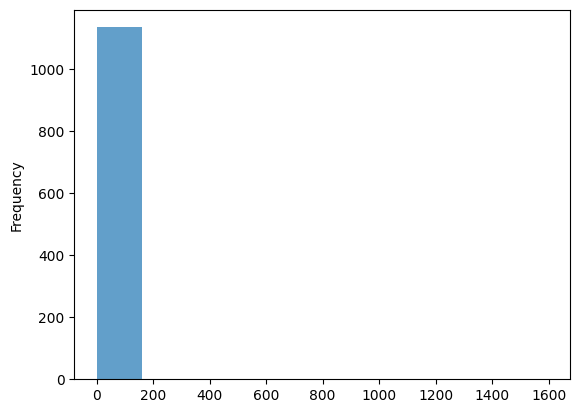

In [135]:
import matplotlib.pyplot as plt
# You might need to install matplotlib with 
# pip install matplotlib

df_dickens.location_count.plot.hist(bins=10, alpha=0.7)

Generally, the data will be very left skewed. You might want to filter out some of the lower values.

### Filter out low counts

As very low counts will not show up on the map anyway, filter them out here. No code has been provided, but the procedure is essentially the same as before.

In [200]:
df_dickens = df_dickens[df_dickens.location_count>50]

### Bucket Data

As we saw in lesson_5, the distribution of the data is tricky. We can solve this by bucketing it along the lines of Jenks Natural Breaks.

In [204]:
import mapclassify as mc #you may get an error. If so install mapclassify with pip install mapclassify

jenks_breaks = mc.NaturalBreaks(y=df_dickens['location_count'], k=5)
df_dickens.loc[:,'location_count_bucket'] = jenks_breaks.find_bin(df_dickens['location_count'])+1

C:\Users\joost\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



### Export Pickle 3

This is the final export of the file for the `project_presentation_template`

```python
df_dickens.to_pickle('df_dickens_SENTIMENTS.pickle')
```


In [207]:
df_dickens.to_pickle('df_dickens_SENTIMENTS.pickle')

---

## Map your Data

### Overview

This is the core of the project. Use the stub below to map your data and then customize the map. I have deliberately set some of the values very poorly to encourage you to work on your own map!

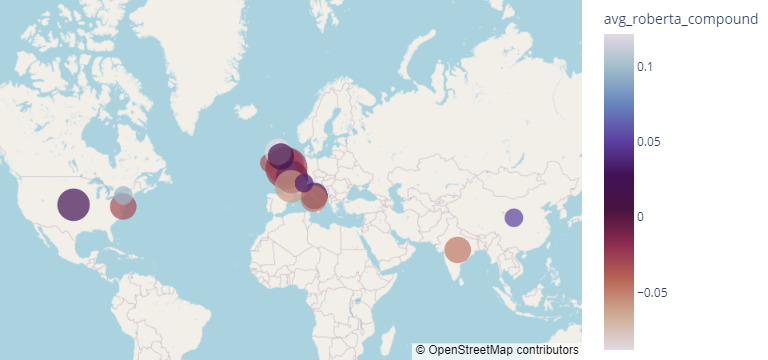

In [212]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_dickens,  #put your dataframe here
    lat="latitude",               # Latitude column
    lon="longitude",              # Longitude column
    size="location_count_bucket",        # Bubble size based on location count
    color="avg_roberta_compound",      # Color based on sentiment score
    color_continuous_scale=px.colors.cyclical.Twilight[::-1],  # Use Twilight scale (blue to red)
    size_max=30,                  # Maximum size of the bubbles
    center={"lat": 48, "lon": 2},
    zoom=6                       # Adjust zoom level for better visibility
)

# Update the layout to use the default map style (which doesn't need a token)
fig.update_layout(
    mapbox_style="open-street-map",  # No token needed for this style
    margin={"r":0,"t":0,"l":0,"b":0}  # Remove margins for a cleaner view
)



fig.show()

Happy mapping!